## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/ddos_data.pkl'  # Update this path to your pickle file location

try:
    df = pd.read_pickle(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

,Flow Duration,Flow Byts/s,Flow Pkts/s,Tot Fwd Pkts,Tot Bwd Pkts,Pkt Len Mean,Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/s,Bwd Pkts/s,Down/Up Ratio,Fwd Blk Rate Avg,Label
0,3974862,15068.950821,18.365417,29,44,809.418919,728.862428,55206.416667,195478.316654,133405.25,92438.651163,29,44,2.965517,1359.340909,7.295851,11.069567,1.0,0,ddos
1,63,0.000000,31746.031746,1,1,0.000000,0.000000,63.000000,0.000000,0.00,0.000000,1,1,0.000000,0.000000,15873.015873,15873.015873,1.0,0,ddos
2,476078,6559.849436,16.803969,2,6,347.000000,632.515217,68011.142857,110862.707451,134.00,95215.600000,2,6,43.000000,506.166667,4.200992,12.602977,3.0,0,ddos
3,151,0.000000,19867.549669,2,1,0.000000,0.000000,75.500000,98.287843,145.00,0.000000,2,1,0.000000,0.000000,13245.033113,6622.516556,0.0,0,ddos
4,472507,2376.684367,14.814595,2,5,140.375000,368.430624,78751.166667,118675.492251,179.00,118126.750000,2,5,36.500000,210.000000,4.232742,10.581854,2.0,0,ddos


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Flow Duration     int64  
 1   Flow Byts/s       float64
 2   Flow Pkts/s       float64
 3   Tot Fwd Pkts      int64  
 4   Tot Bwd Pkts      int64  
 5   Pkt Len Mean      float64
 6   Pkt Len Std       float64
 7   Flow IAT Mean     float64
 8   Flow IAT Std      float64
 9   Fwd IAT Mean      float64
 10  Bwd IAT Mean      float64
 11  Subflow Fwd Pkts  int64  
 12  Subflow Bwd Pkts  int64  
 13  Fwd Seg Size Avg  float64
 14  Bwd Seg Size Avg  float64
 15  Fwd Pkts/s        float64
 16  Bwd Pkts/s        float64
 17  Down/Up Ratio     float64
 18  Fwd Blk Rate Avg  int64  
 19  Label             object 
dtypes: float64(13), int64(6), object(1)
memory usage: 1.9+ GB


In [6]:
df.isnull().sum()

,0
Flow Duration,0
Flow Byts/s,29713
Flow Pkts/s,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
Pkt Len Mean,0
Pkt Len Std,0
Flow IAT Mean,0
Flow IAT Std,0
Fwd IAT Mean,0


In [7]:
infinite_values = df.replace([np.inf, -np.inf], np.nan).isnull().sum()
display(infinite_values)

,0
Flow Duration,0
Flow Byts/s,47780
Flow Pkts/s,47780
Tot Fwd Pkts,0
Tot Bwd Pkts,0
Pkt Len Mean,0
Pkt Len Std,0
Flow IAT Mean,0
Flow IAT Std,0
Fwd IAT Mean,0


In [8]:
print(f"Original number of rows: {len(df)}")

Original number of rows: 12794627


In [4]:

# Replace infinite values with NaN
df_temp = df.replace([np.inf, -np.inf], np.nan)

# Drop rows with any NaN values (which now include original nulls and converted infinities)
df_cleaned = df_temp.dropna()

display(df_cleaned.head())
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping null and infinite values: {len(df_cleaned)}")

,Flow Duration,Flow Byts/s,Flow Pkts/s,Tot Fwd Pkts,Tot Bwd Pkts,Pkt Len Mean,Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/s,Bwd Pkts/s,Down/Up Ratio,Fwd Blk Rate Avg,Label
0,3974862,15068.950821,18.365417,29,44,809.418919,728.862428,55206.416667,195478.316654,133405.25,92438.651163,29,44,2.965517,1359.340909,7.295851,11.069567,1.0,0,ddos
1,63,0.000000,31746.031746,1,1,0.000000,0.000000,63.000000,0.000000,0.00,0.000000,1,1,0.000000,0.000000,15873.015873,15873.015873,1.0,0,ddos
2,476078,6559.849436,16.803969,2,6,347.000000,632.515217,68011.142857,110862.707451,134.00,95215.600000,2,6,43.000000,506.166667,4.200992,12.602977,3.0,0,ddos
3,151,0.000000,19867.549669,2,1,0.000000,0.000000,75.500000,98.287843,145.00,0.000000,2,1,0.000000,0.000000,13245.033113,6622.516556,0.0,0,ddos
4,472507,2376.684367,14.814595,2,5,140.375000,368.430624,78751.166667,118675.492251,179.00,118126.750000,2,5,36.500000,210.000000,4.232742,10.581854,2.0,0,ddos


Original number of rows: 12794627
Number of rows after dropping null and infinite values: 12746847


,count
Label,
ddos,6472617
Benign,6274230


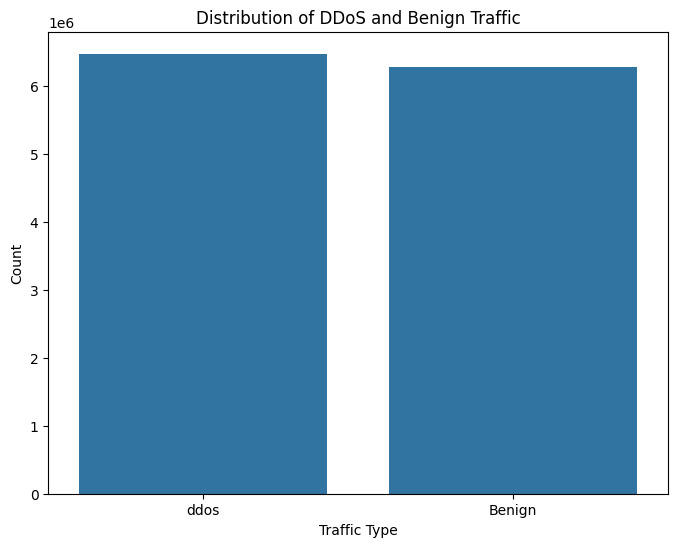

In [12]:
# Check the distribution of the 'Label' column
label_counts = df_cleaned['Label'].value_counts()
display(label_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Label')
plt.title('Distribution of DDoS and Benign Traffic')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()

In [5]:
# Delete unused DataFrames to free up memory
if 'df' in globals():
    del df
if 'df_temp' in globals():
    del df_temp

print("Deleted unused DataFrames: df, df_temp")

Deleted unused DataFrames: df, df_temp


## **Data Visualization**

# **Flow-Level Feature Insights**

**1. Flow Duration vs Attack**

Flow Duration Statistics by Label:
                 mean   median  min        max
Label                                        
Benign  1.354313e+07  28139.0   -1  120000000
ddos    3.119900e+06  36006.0    1  119999998


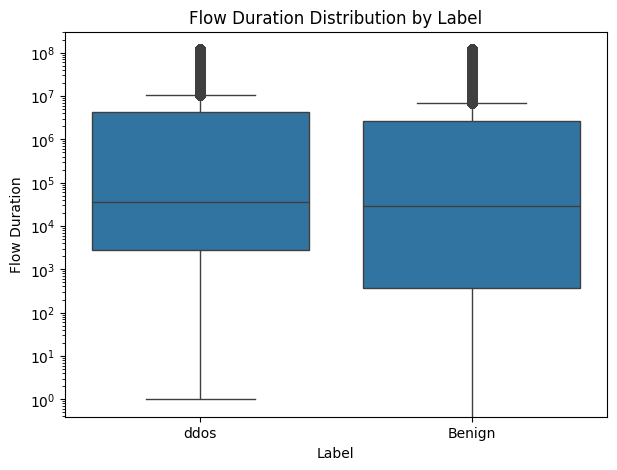

In [28]:
duration_stats = df_cleaned.groupby("Label")["Flow Duration"].agg(["mean", "median", "min", "max"])
print("Flow Duration Statistics by Label:\n", duration_stats)

plt.figure(figsize=(7,5))
sns.boxplot(x="Label", y="Flow Duration", data=df_cleaned)
plt.title("Flow Duration Distribution by Label")
plt.yscale("log")  # log scale helps see bursty durations
plt.show()


- Benign flows exhibit **longer average durations**.  
- DDoS flows are generally **short-lived and bursty**, but still show occasional long flows.

**2. Flow Pkts/s & Flow Byts/s**


Flow Pkts/s & Byts/s Stats:
        Flow Pkts/s                                                       \
             count          mean            std           min       25%   
Label                                                                     
Benign   6274230.0  37550.754516  230829.126644 -2.000000e+06  5.734998   
ddos     6472617.0  13191.237906  102311.216193  1.666971e-02  1.912757   

                                           Flow Byts/s                 \
               50%          75%        max       count           mean   
Label                                                                   
Benign  125.039793  6430.868167  6000000.0   6274230.0  382926.594104   
ddos     69.785294   838.222967  2000000.0   6472617.0   75831.937272   

                                                                                
                 std  min        25%          50%            75%           max  
Label                                                             

Text(0.5, 1.0, 'Packets per Second by Label')

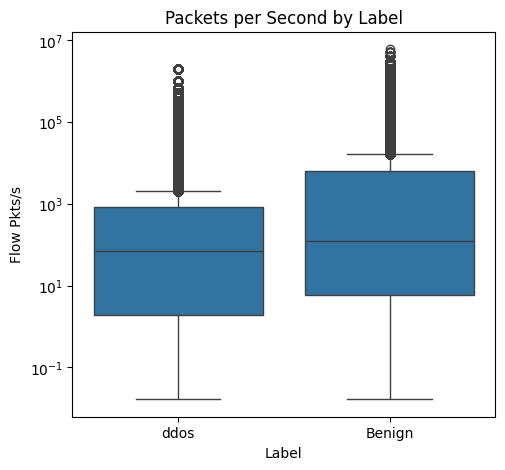

In [29]:
pkt_rate_stats = df_cleaned.groupby("Label")[["Flow Pkts/s", "Flow Byts/s"]].describe()
print("\nFlow Pkts/s & Byts/s Stats:\n", pkt_rate_stats)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Label", y="Flow Pkts/s", data=df_cleaned)
plt.yscale("log")
plt.title("Packets per Second by Label")

#### Packets per Second (Flow Pkts/s)
- **Benign:**  
  - Mean ≈ 37.5k, Std ≈ 230k  
  - Median ≈ 20, with wide spread  
- **DDoS:**  
  - Mean ≈ 13k, Std ≈ 102k  
  - Median ≈ 1.9, much lower than benign  

🔹 *Benign traffic shows higher average packet rates, but DDoS traffic is bursty with many small flows.*

#### Bytes per Second (Flow Byts/s)
- **Benign:**  
  - Mean ≈ 383k, Std ≈ 7.69M  
  - Median ≈ 1.35k, heavy-tailed up to **2.06B**  
- **DDoS:**  
  - Mean ≈ 75k, Std ≈ 835k  
  - Median ≈ 4.9, lower variance, max ≈ **724M**  

🔹 *Benign flows carry much larger byte volumes, while DDoS floods rely on very small packets at high frequency.*

#### Visualization Insight
- Boxplot shows:  
  - **Benign flows** → broader distribution, higher medians.  
  - **DDoS flows** → concentrated at low values, but with extreme outliers.

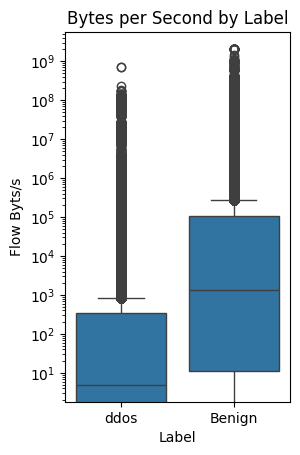

In [30]:
plt.subplot(1,2,2)
sns.boxplot(x="Label", y="Flow Byts/s", data=df_cleaned)
plt.yscale("log")
plt.title("Bytes per Second by Label")
plt.show()

**3. Forward vs Backward Packets**


Forward vs Backward Packet Analysis:
         Tot Fwd Pkts  Tot Bwd Pkts  Fwd/Bwd Ratio
Label                                            
Benign      6.295579      7.487919       1.356475
ddos       47.642659      2.574219      30.162389


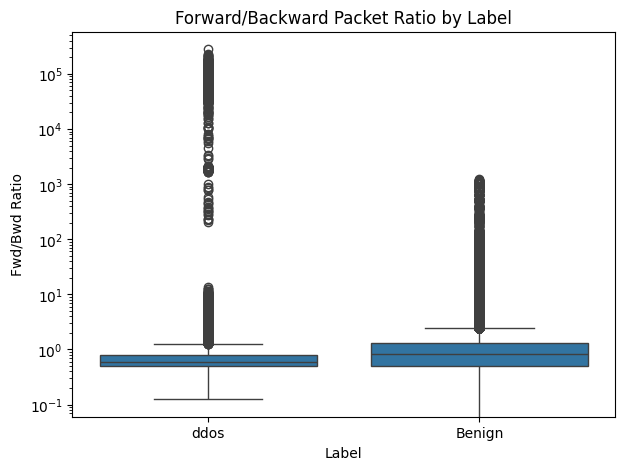

In [31]:
df_cleaned["Fwd/Bwd Ratio"] = df_cleaned["Tot Fwd Pkts"] / (df_cleaned["Tot Bwd Pkts"] + 1)  # +1 avoids div by zero

fwd_bwd_stats = df_cleaned.groupby("Label")[["Tot Fwd Pkts", "Tot Bwd Pkts", "Fwd/Bwd Ratio"]].mean()
print("\nForward vs Backward Packet Analysis:\n", fwd_bwd_stats)

plt.figure(figsize=(7,5))
sns.boxplot(x="Label", y="Fwd/Bwd Ratio", data=df_cleaned)
plt.yscale("log")
plt.title("Forward/Backward Packet Ratio by Label")
plt.show()

Benign traffic has a tight cluster of ratios near 1, with some outliers but generally balanced.

DDoS traffic has a highly skewed distribution:

Many flows show very high Fwd/Bwd ratios (extreme outliers up to
10**5).

This indicates attackers flood the victim with packets while the victim responds very little.

**Key Insights:**

- Benign traffic ≈ balanced packet exchange.

- DDoS traffic ≈ asymmetric flow with extreme forward dominance.

- The Fwd/Bwd ratio is a powerful distinguishing feature between normal and DDoS traffic.

# **2. Traffic Behavior Ratios**

**1. Down/Up Ratio**

Down/Up Ratio Statistics:
             count      mean       std  min  25%  50%  75%    max
Label                                                           
Benign  6274230.0  0.592861  1.284996  0.0  0.0  1.0  1.0  311.0
ddos    6472617.0  0.796173  0.503924  0.0  1.0  1.0  1.0    7.0


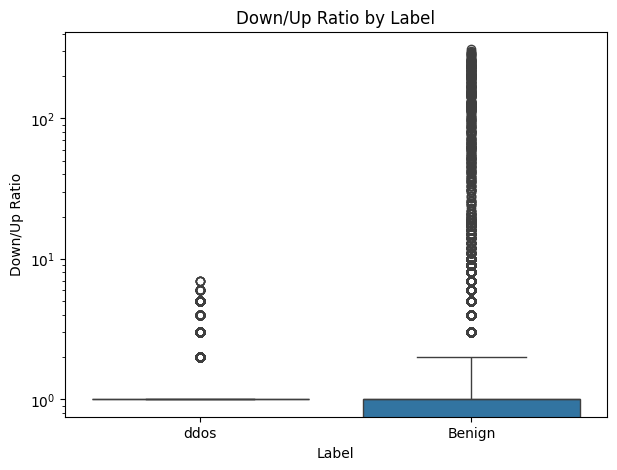

In [32]:
down_up_stats = df_cleaned.groupby("Label")["Down/Up Ratio"].describe()
print("Down/Up Ratio Statistics:\n", down_up_stats)

plt.figure(figsize=(7,5))
sns.boxplot(x="Label", y="Down/Up Ratio", data=df_cleaned)
plt.yscale("log")   # log scale to see skewed ratios
plt.title("Down/Up Ratio by Label")
plt.show()

- **Benign Traffic**
  - Mean: ~0.59  
  - Std: 1.28 (high variability)  
  - Ratio can reach **311** (many extreme outliers).  

- **DDoS Traffic**
  - Mean: ~0.79  
  - Std: 0.50 (low variability)  
  - Max ratio only **7**, mostly concentrated around 1.  

**Observation:**  
Benign traffic shows a **wide spread with extreme outliers**, while DDoS traffic remains **tightly clustered near 1**, indicating more uniform download/upload patterns during attacks.

**2. Forward/Backward Packets Ratio**


Fwd/Bwd Packets Ratio Statistics:
             count       mean          std  min  25%       50%       75%  \
Label                                                                     
Benign  6274230.0   1.356475     6.005547  0.0  0.5  0.818182  1.285714   
ddos    6472617.0  30.162389  1694.216869  0.0  0.5  0.600000  0.800000   

             max  
Label             
Benign    1257.0  
ddos    280043.0  


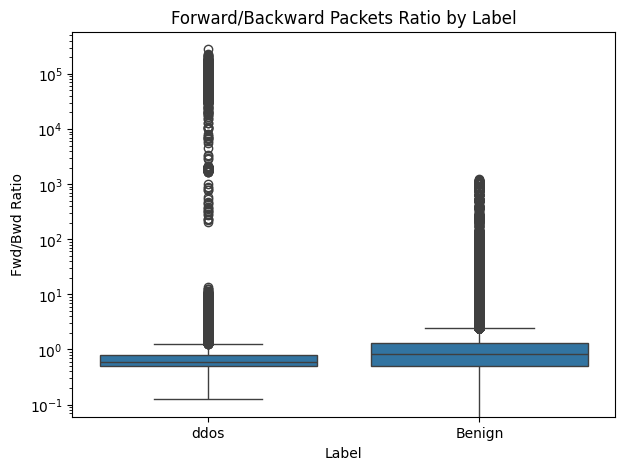

In [33]:
df_cleaned["Fwd/Bwd Ratio"] = df_cleaned["Tot Fwd Pkts"] / (df_cleaned["Tot Bwd Pkts"] + 1)

fwd_bwd_stats = df_cleaned.groupby("Label")["Fwd/Bwd Ratio"].describe()
print("\nFwd/Bwd Packets Ratio Statistics:\n", fwd_bwd_stats)

plt.figure(figsize=(7,5))
sns.boxplot(x="Label", y="Fwd/Bwd Ratio", data=df_cleaned)
plt.yscale("log")
plt.title("Forward/Backward Packets Ratio by Label")
plt.show()

- **Benign Traffic**  
  - Mean: ~1.36  
  - Std Dev: ~6.00  
  - Ratio mostly balanced (closer to 1).  
  - Max: 1257  

- **DDoS Traffic**  
  - Mean: ~30.16  
  - Std Dev: ~1694.21 (very high variation).  
  - Skewed with extreme outliers (max: 280043).  
  - Majority of values cluster near very low ratios.  

**Observation:**  
- Benign traffic shows stable forward/backward ratios near 1.  
- DDoS traffic is highly skewed with extreme spikes in ratio, indicating **abnormal asymmetry in packet flow**.

# **3. Temporal Characteristics**

**1.Flow IAT Mean & Std**

Flow IAT Mean & Std Statistics:
        Flow IAT Mean                                                    \
               count          mean           std  min     25%      50%   
Label                                                                    
Benign     6274230.0  2.428825e+06  1.117993e+07 -1.0   302.0  12726.0   
ddos       6472617.0  1.319942e+06  5.864359e+06  1.0  2209.0  25364.0   

                                   Flow IAT Std                              \
                  75%          max        count          mean           std   
Label                                                                         
Benign  190863.373026  119999328.0    6274230.0  1.234874e+06  4.132044e+06   
ddos    595965.125000  119978074.0    6472617.0  6.902718e+05  2.561851e+06   

                                                          
        min  25%         50%           75%           max  
Label                                                     
Benign  0.0  0.0  107.8

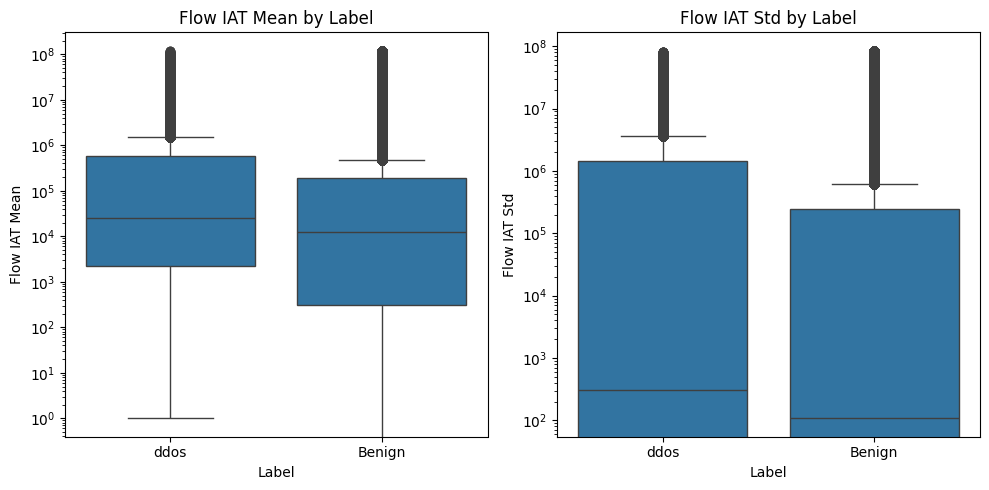

In [34]:
iat_stats = df_cleaned.groupby("Label")[["Flow IAT Mean", "Flow IAT Std"]].describe()
print("Flow IAT Mean & Std Statistics:\n", iat_stats)

# Boxplots for comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Label", y="Flow IAT Mean", data=df_cleaned)
plt.yscale("log")
plt.title("Flow IAT Mean by Label")

plt.subplot(1,2,2)
sns.boxplot(x="Label", y="Flow IAT Std", data=df_cleaned)
plt.yscale("log")
plt.title("Flow IAT Std by Label")

plt.tight_layout()
plt.show()


- DDoS flows generally show higher inter-arrival mean values, indicating irregular packet timing compared to benign traffic.
- DDoS traffic exhibits much higher variability in inter-arrival times, consistent with attack bursts and irregular flows.

**Key Insight:**

- DDoS flows have higher mean and standard deviation in packet inter-arrival times.

- Benign flows show more consistency but still contain outliers.

- These features are strong indicators for differentiating DDoS vs Benign traffic.



**2.Forward vs Backward IAT**


Forward & Backward IAT Statistics:
        Fwd IAT Mean                                               \
              count          mean           std  min  25%    50%   
Label                                                              
Benign    6274230.0  2.801535e+06  1.138503e+07  0.0  0.0  395.0   
ddos      6472617.0  1.058667e+06  5.685509e+06  0.0  0.0  482.0   

                                   Bwd IAT Mean                              \
                  75%          max        count          mean           std   
Label                                                                         
Benign  312959.830357  119999328.0    6274230.0  1.118486e+06  5.234362e+06   
ddos     27541.666667  118246409.0    6472617.0  5.764015e+05  2.364500e+06   

                                                     
        min  25%     50%           75%          max  
Label                                                
Benign -1.0  0.0    0.00  2.588918e+05  119963750.0  
ddos    0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


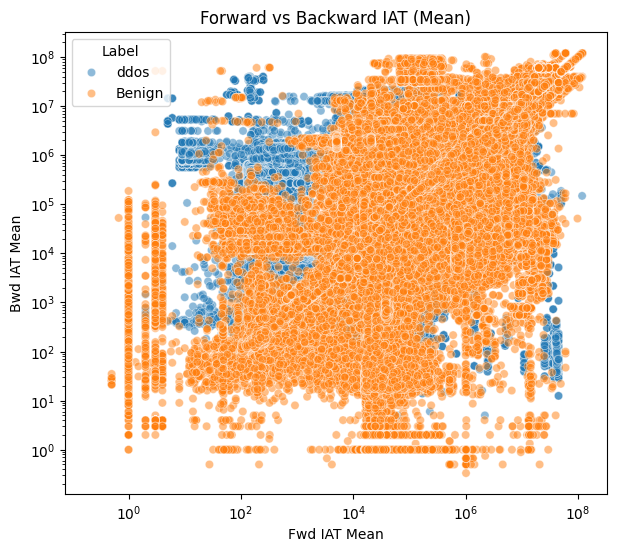

In [35]:
fwd_bwd_iat_stats = df_cleaned.groupby("Label")[["Fwd IAT Mean", "Bwd IAT Mean"]].describe()
print("\nForward & Backward IAT Statistics:\n", fwd_bwd_iat_stats)

# Scatterplot: Forward vs Backward IAT
plt.figure(figsize=(7,6))
sns.scatterplot(x="Fwd IAT Mean", y="Bwd IAT Mean", hue="Label", data=df_cleaned, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Forward vs Backward IAT (Mean)")
plt.show()

### **Forward IAT Mean**
- **Benign**:  
  - Median ≈ **395**  
  - Higher overall mean (**2.8M**) due to long-tail outliers.  
  - Wide variability, max ≈ **120M**.  

- **DDoS**:  
  - Median ≈ **482** (slightly higher than benign).  
  - Lower mean (**1.05M**) and tighter spread compared to benign.  
  - Still exhibits large outliers up to **118M**.  

  *DDoS forward IAT is more concentrated, while benign has greater spread.*  

---

### **Backward IAT Mean**
- **Benign**:  
  - Median = **0** (most flows lack backward responses).  
  - Mean ≈ **1.1M**, with very high outliers up to **120M**.  

- **DDoS**:  
  - Median ≈ **311** (non-zero).  
  - Mean ≈ **576K**, with max ≈ **117M**.  
  - Shows more consistent backward activity than benign.  

  *In benign flows, many backward IATs are **0**, while in DDoS there is more consistent backward timing, though still irregular.*  

---

**Key Insight:**  
- **Benign traffic**: Higher spread and more flows with **no backward packets** (Bwd IAT = 0).  
- **DDoS traffic**: Forward IAT is concentrated, and backward IAT shows **non-zero consistent values**, reflecting automated attack patterns.  

# **4. Packet Size Patterns**

**1.Compute Mean & Std per Label**

In [6]:
pkt_stats = df_cleaned.groupby("Label")[["Pkt Len Mean", "Pkt Len Std"]].mean()
print("Average Packet Length Stats per Label:\n", pkt_stats)

Average Packet Length Stats per Label:
         Pkt Len Mean  Pkt Len Std
Label                            
Benign     84.329323   121.012178
ddos       72.887572   161.548347


**2. Compare Std across Classes**

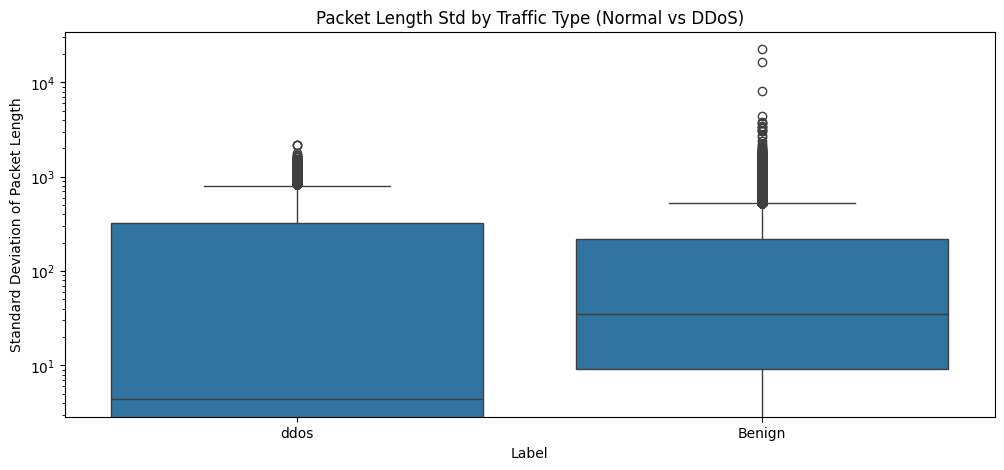

In [7]:
plt.figure(figsize=(12,5))

# Distribution of Packet Length Standard Deviation
sns.boxplot(x="Label", y="Pkt Len Std", data=df_cleaned)
plt.yscale("log")   # log scale to handle outliers
plt.title("Packet Length Std by Traffic Type (Normal vs DDoS)")
plt.ylabel("Standard Deviation of Packet Length")

plt.show()


The boxplot compares the **standard deviation of packet lengths** between **DDoS** and **Benign** traffic:

- **DDoS traffic** shows a relatively lower spread in packet length variability, with fewer extreme outliers.  
- **Benign traffic** displays a wider distribution with higher variability and more extreme outliers.  
- The log scale highlights the magnitude differences, showing that benign traffic can reach very high variability compared to DDoS.  

In [36]:

# ---------------------------
std_comparison = df_cleaned.groupby("Label")["Pkt Len Std"].agg(["mean","median","std"])
print("\nComparison of Packet Length Std across Labels:\n", std_comparison)


Comparison of Packet Length Std across Labels:
               mean     median         std
Label                                    
Benign  121.012178  35.218366  169.367037
ddos    161.548347   4.381780  163.236693


# **5. Subflow Analysis**

**1. Average Subflow Packets per Label**

In [37]:
subflow_avg = df_cleaned.groupby("Label")[["Subflow Fwd Pkts", "Subflow Bwd Pkts"]].mean()
print("Average Subflow Packets per Label:\n", subflow_avg)

Average Subflow Packets per Label:
         Subflow Fwd Pkts  Subflow Bwd Pkts
Label                                     
Benign          6.295579          7.487919
ddos           47.642659          2.574219


**2. Subflow Ratio (Fwd / Bwd)**

In [38]:
df_cleaned["Subflow_Ratio"] = df_cleaned["Subflow Fwd Pkts"] / (df_cleaned["Subflow Bwd Pkts"] + 1)

subflow_ratio = df_cleaned.groupby("Label")["Subflow_Ratio"].mean()
print("\nAverage Subflow Fwd/Bwd Ratio per Label:\n", subflow_ratio)


Average Subflow Fwd/Bwd Ratio per Label:
 Label
Benign     1.356475
ddos      30.162389
Name: Subflow_Ratio, dtype: float64


**3. Visualization**

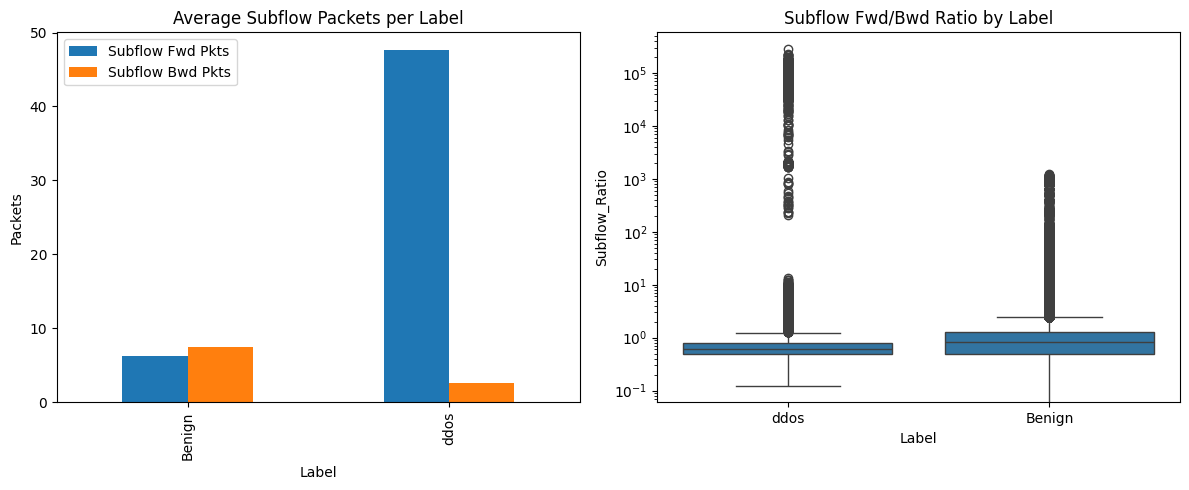

In [39]:
plt.figure(figsize=(12,5))

# Barplot for average subflows
plt.subplot(1,2,1)
subflow_avg.plot(kind="bar", ax=plt.gca())
plt.title("Average Subflow Packets per Label")
plt.ylabel("Packets")

# Boxplot for Subflow Ratio
plt.subplot(1,2,2)
sns.boxplot(x="Label", y="Subflow_Ratio", data=df_cleaned)
plt.yscale("log")
plt.title("Subflow Fwd/Bwd Ratio by Label")

plt.tight_layout()
plt.show()

- **Average Subflow Packets**:  
  - **DDoS traffic** shows a very high number of **forward packets** but very few **backward packets**.  
  - **Benign traffic** has a more balanced distribution between forward and backward packets.  

- **Subflow Fwd/Bwd Ratio**:  
  - **DDoS traffic** exhibits a high imbalance, with forward packets dominating (extreme ratio values).  
  - **Benign traffic** maintains a relatively balanced ratio, though with some variability and outliers.  

In [12]:
# Identify numerical features (excluding the 'Label' column)
import numpy as np
numerical_features = df_cleaned.select_dtypes(include=np.number).columns.tolist()
if 'Label' in numerical_features:
    numerical_features.remove('Label')

print(f"Identified numerical features: {numerical_features}")

Identified numerical features: ['Flow Duration', 'Flow Byts/s', 'Flow Pkts/s', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Pkt Len Mean', 'Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Down/Up Ratio', 'Fwd Blk Rate Avg']


Now, let's visualize the distribution of the first numerical feature for 'ddos' and 'Benign' labels.

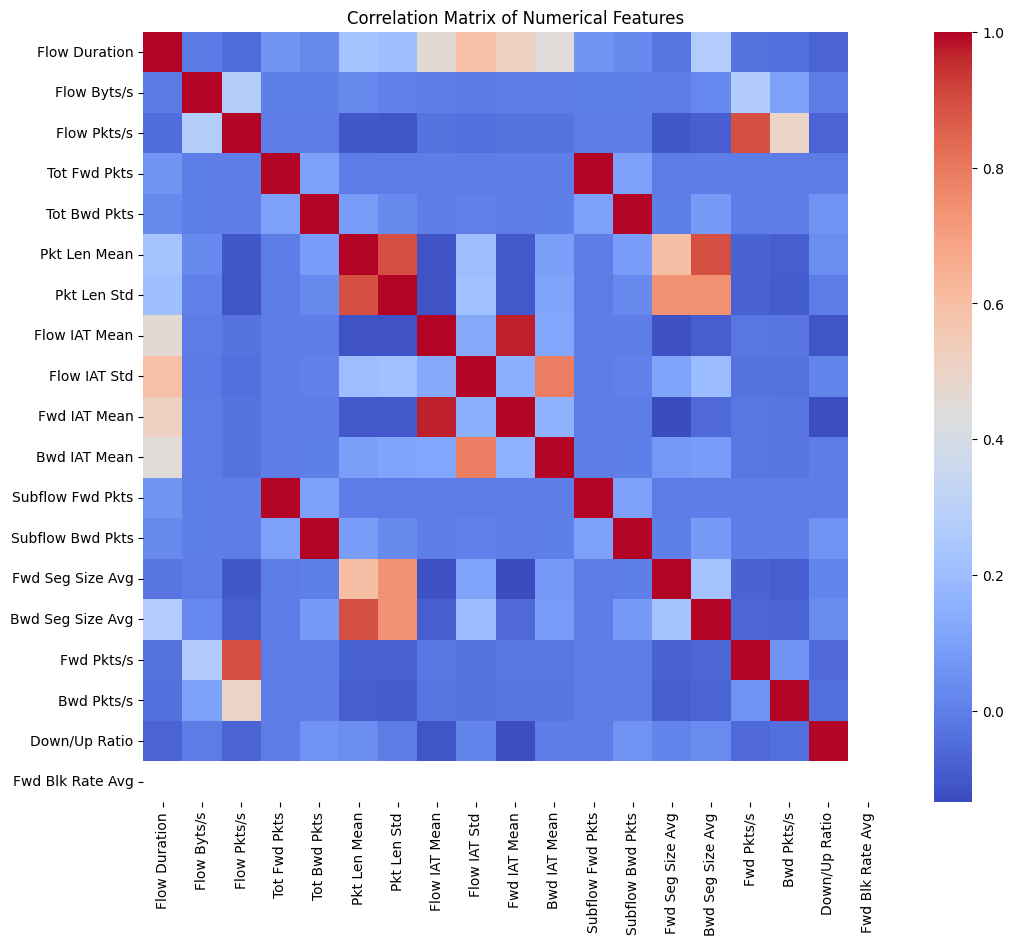

In [13]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df_cleaned[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Key Observations:
- **Flow Packets/s & Flow Bytes/s** show a strong positive correlation, indicating higher packet rate usually leads to higher throughput.  
- **Forward and Backward packet lengths** have noticeable correlations, suggesting dependency between request and response traffic patterns.  
- **Packet length mean and standard deviation** are moderately correlated, meaning higher average packet sizes often lead to more variation.  
- Some features (e.g., `Idle Mean`, `Idle Std`) show very weak correlations with traffic volume features, suggesting they capture independent behaviors.  

In [14]:
# Calculate and display descriptive statistics by Label
descriptive_stats_by_label = df_cleaned.groupby('Label')[numerical_features].describe()
display(descriptive_stats_by_label)

Flow Duration                                                    \
               count          mean           std  min     25%      50%   
Label                                                                    
Benign     6274230.0  1.354313e+07  3.321464e+07 -1.0   370.0  28139.0   
ddos       6472617.0  3.119900e+06  9.474920e+06  1.0  2826.0  36006.0   

                                Flow Byts/s                 ... Down/Up Ratio  \
               75%          max       count           mean  ...           75%   
Label                                                       ...                 
Benign  2707944.75  120000000.0   6274230.0  382926.594104  ...           1.0   
ddos    4282190.00  119999998.0   6472617.0   75831.937272  ...           1.0   

              Fwd Blk Rate Avg                                     
          max            count mean  std  min  25%  50%  75%  max  
Label                                                              
Benign  311.0        6274230.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
ddos      7.0        6472617.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 152 columns]

# Task
Prepare the cleaned dataset `df_cleaned` for machine learning modeling by separating features and target, encoding the target variable, splitting the data into training and testing sets, and applying feature scaling.

## Separate features and target variable

### Subtask:
Split the `df_cleaned` DataFrame into features (X) and the target variable (y).


**Reasoning**:
Split the dataframe into features (X) and target (y) by dropping the 'Label' column from the features and selecting only the 'Label' column for the target.



In [15]:
X = df_cleaned.drop('Label', axis=1)
y = df_cleaned['Label']

display(X.head())
display(y.head())

,Flow Duration,Flow Byts/s,Flow Pkts/s,Tot Fwd Pkts,Tot Bwd Pkts,Pkt Len Mean,Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/s,Bwd Pkts/s,Down/Up Ratio,Fwd Blk Rate Avg
0,3974862,15068.950821,18.365417,29,44,809.418919,728.862428,55206.416667,195478.316654,133405.25,92438.651163,29,44,2.965517,1359.340909,7.295851,11.069567,1.0,0
1,63,0.000000,31746.031746,1,1,0.000000,0.000000,63.000000,0.000000,0.00,0.000000,1,1,0.000000,0.000000,15873.015873,15873.015873,1.0,0
2,476078,6559.849436,16.803969,2,6,347.000000,632.515217,68011.142857,110862.707451,134.00,95215.600000,2,6,43.000000,506.166667,4.200992,12.602977,3.0,0
3,151,0.000000,19867.549669,2,1,0.000000,0.000000,75.500000,98.287843,145.00,0.000000,2,1,0.000000,0.000000,13245.033113,6622.516556,0.0,0
4,472507,2376.684367,14.814595,2,5,140.375000,368.430624,78751.166667,118675.492251,179.00,118126.750000,2,5,36.500000,210.000000,4.232742,10.581854,2.0,0


,Label
0,ddos
1,ddos
2,ddos
3,ddos
4,ddos


## Encode the target variable


Convert the categorical 'Label' column into a numerical format that can be used by machine learning algorithms (e.g., using Label Encoding or One-Hot Encoding).



Encode the categorical target variable 'y' into a numerical format using Label Encoding.



In [16]:


# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y = label_encoder.fit_transform(y)

# Display the first few values of the encoded target variable
display(y[:5])

array([1, 1, 1, 1, 1])

## Split data into training and testing sets


Divide the features and target variable into training and testing sets to evaluate the model's performance on unseen data.



Split the features and encoded target variable into training and testing sets and print their shapes.



In [17]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10197477, 19)
Shape of X_test: (2549370, 19)
Shape of y_train: (10197477,)
Shape of y_test: (2549370,)


## Feature scaling


Apply feature scaling to the numerical features of the training and testing sets.



Apply standard scaling to the numerical features of the training and testing sets.



In [18]:


# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Overwrite the original DataFrames with the scaled versions
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train.head())
display(X_test.head())

,Flow Duration,Flow Byts/s,Flow Pkts/s,Tot Fwd Pkts,Tot Bwd Pkts,Pkt Len Mean,Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/s,Bwd Pkts/s,Down/Up Ratio,Fwd Blk Rate Avg
9287726,4.227408,-0.042624,-0.141509,-0.011158,0.000125,0.825668,0.073430,0.848525,4.088285,1.582023,6.761919,-0.011158,0.000125,0.333845,0.816182,-0.102582,-0.116243,-0.707336,0.0
4591051,-0.332444,-0.042627,-0.129602,-0.015210,-0.015652,-0.831176,-0.845061,-0.209449,-0.278914,-0.213027,-0.208226,-0.015210,-0.015652,-0.809700,-0.651414,-0.095737,-0.103011,0.308689,0.0
1539087,-0.332338,0.019805,-0.130479,-0.013473,-0.007763,0.735680,1.123046,-0.209488,-0.278610,-0.212895,-0.207859,-0.013473,-0.007763,1.665334,-0.065223,-0.095335,-0.105737,-0.707336,0.0
8254855,-0.163802,-0.042505,-0.141482,-0.010001,0.019846,0.544612,0.864946,-0.184834,-0.187054,-0.161380,-0.096332,-0.010001,0.019846,0.405846,0.465174,-0.102567,-0.116214,0.308689,0.0
12694911,-0.199504,-0.042326,-0.141477,-0.010579,0.019846,1.965874,1.678329,-0.188984,-0.206391,-0.167222,-0.123284,-0.010579,0.019846,0.786792,2.122046,-0.102565,-0.116206,0.308689,0.0


,Flow Duration,Flow Byts/s,Flow Pkts/s,Tot Fwd Pkts,Tot Bwd Pkts,Pkt Len Mean,Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/s,Bwd Pkts/s,Down/Up Ratio,Fwd Blk Rate Avg
8621052,-0.332416,-0.025863,-0.134599,-0.015210,-0.015652,-0.174791,-0.627947,-0.209372,-0.278914,-0.213027,-0.208226,-0.015210,-0.015652,-0.375577,0.083090,-0.098610,-0.108565,0.308689,0.0
7525665,-0.236151,-0.042418,-0.141467,-0.010579,0.015902,0.647642,0.814652,-0.193776,-0.209427,-0.179845,-0.139481,-0.010579,0.015902,0.562083,0.516259,-0.102558,-0.116197,0.308689,0.0
9111973,-0.222327,-0.042457,-0.141474,-0.010001,0.008014,0.625694,0.879110,-0.190384,-0.206479,-0.179299,-0.102009,-0.010001,0.008014,0.299962,0.790353,-0.102559,-0.116212,-0.707336,0.0
8048147,-0.221922,-0.042440,-0.141470,-0.011158,0.023791,0.613402,0.899866,-0.192452,-0.201758,-0.169503,-0.142067,-0.011158,0.023791,0.709733,0.363666,-0.102564,-0.116194,0.308689,0.0
5684710,-0.118645,-0.042581,-0.141500,-0.013473,0.000125,0.558879,0.983629,-0.135127,0.155831,-0.212058,0.118014,-0.013473,0.000125,1.665334,-0.117486,-0.102578,-0.116232,0.308689,0.0


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into features (X) and the target variable (y).
*   The categorical 'Label' target variable was encoded into a numerical format using `LabelEncoder`.
*   The data was split into training and testing sets with an 80/20 ratio, resulting in 10,197,477 samples for training and 2,549,370 samples for testing for both features and the target variable.
*   Numerical features in both the training and testing sets were successfully scaled using `StandardScaler`.



*   The prepared `X_train`, `X_test`, `y_train`, and `y_test` datasets are ready for training and evaluating various machine learning models for the classification task.


In [19]:


# Instantiate the Logistic Regression model
# Using 'lbfgs' solver and increased max_iter for better convergence on potentially large datasets
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Training complete.")



Training Logistic Regression model...
Training complete.


In [20]:

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Model Evaluation:
Accuracy: 0.9395
Precision: 0.9123
Recall: 0.9746
F1-Score: 0.9424

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94   1254125
           1       0.91      0.97      0.94   1295245

    accuracy                           0.94   2549370
   macro avg       0.94      0.94      0.94   2549370
weighted avg       0.94      0.94      0.94   2549370



## Logistic Regression Model Evaluation

The Logistic Regression model achieved an overall **accuracy of 93.95%**, which indicates that the model correctly predicted the outcomes in the majority of cases.

- **Precision (91.23%)**suggests that when the model predicts the positive class (class 1), it is correct most of the time. However, there are still some false positives.

- **Recall (97.46%)** is very high, which means the model successfully identified the majority of actual positive cases. This is particularly important in scenarios where missing a positive case (false negative) is costly.

- **F1-Score (94.24%)** provides a balance between precision and recall, confirming that the model performs consistently well across both metrics.

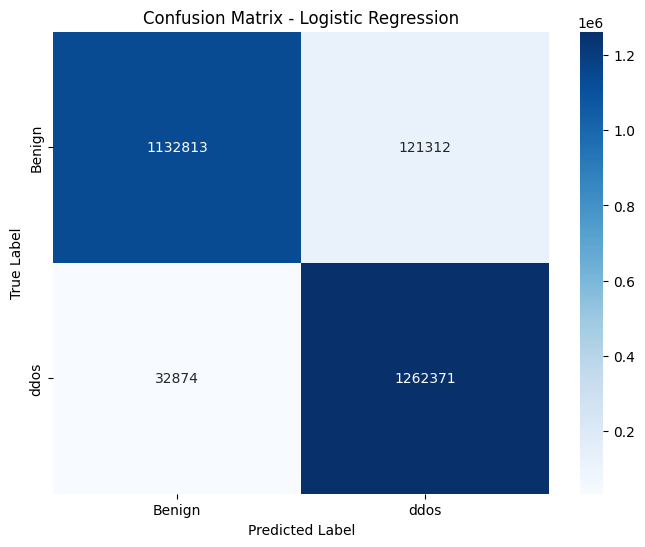

In [21]:



# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'ddos'], yticklabels=['Benign', 'ddos'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**1. High True Positives (TP):** The model is very effective at detecting DDoS attacks, with over 1.26 million correctly identified attacks.

**2. Low False Negatives (FN):** Only about 32.8k DDoS instances were missed, giving a very high recall (97%). This is crucial because missing attacks is riskier than flagging benign traffic.

**3. Moderate False Positives (FP):** Around 121k benign instances were flagged as DDoS. While this increases the false alarm rate, it is less critical than missing an actual attack.

**4. Overall Balance:** The confusion matrix reflects the precision-recall trade-off, where the model prioritizes recall for the positive class (DDoS) to ensure minimal missed attacks.



In [22]:



# Instantiate the Random Forest model
# Using a smaller number of estimators for quicker initial training on a large dataset
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training Random Forest model...")
random_forest_model.fit(X_train, y_train)
print("Training complete.")



Training Random Forest model...
Training complete.



Random Forest Model Evaluation:
Accuracy: 0.9945
Precision: 0.9935
Recall: 0.9957
F1-Score: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1254125
           1       0.99      1.00      0.99   1295245

    accuracy                           0.99   2549370
   macro avg       0.99      0.99      0.99   2549370
weighted avg       0.99      0.99      0.99   2549370



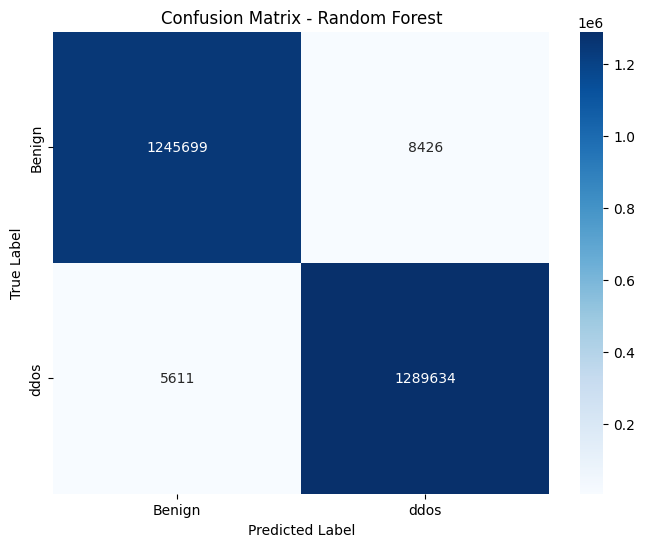

In [23]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate and plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'ddos'], yticklabels=['Benign', 'ddos'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Random Forest Model Evaluation

The Random Forest classifier achieved an exceptionally high accuracy of 99.45%, demonstrating a strong ability to correctly classify both benign and DDoS traffic.

- **Precision (99.35%)** indicates that almost all instances predicted as DDoS are indeed attacks, meaning the model generates very few false alarms.

- **Recall (99.57%)** shows that the model is highly effective at capturing nearly all actual DDoS cases, ensuring minimal missed detections.

- **F1-Score (99.46%**), which balances precision and recall, further confirms the robustness and consistency of the model.

1. Extremely High Detection Rate: With 1.29 million correct DDoS detections and only 5,611 misses, the recall is close to perfect (99.6%).

2. Very Low False Positives: Only 8,426 benign instances misclassified as DDoS, giving an excellent precision rate (99.3%).

3. Balanced Performance: The confusion matrix confirms both classes are classified with high accuracy, making the Random Forest highly reliable.

# Overall Interpretation

The Random Forest model significantly outperforms Logistic Regression in terms of minimizing misclassifications. It reduces false positives (from 121k → 8k) and false negatives (from 32k → 5k), which means it not only detects attacks more accurately but also raises fewer false alarms. This makes it a superior choice for real-world DDoS detection, where both high recall (catch all attacks) and low false positives (avoid unnecessary alerts) are essential.

In [24]:
!pip install lightgbm

In [25]:



# Instantiate the LightGBM classifier
# Using 'n_estimators' and 'n_jobs' for potentially faster training
lgbm_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("Training complete.")



Training LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5177372, number of negative: 5020105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.803754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4324
[LightGBM] [Info] Number of data points in the train set: 10197477, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507711 -> initscore=0.030847
[LightGBM] [Info] Start training from score 0.030847
Training complete.



LightGBM Model Evaluation:
Accuracy: 0.9934
Precision: 0.9927
Recall: 0.9943
F1-Score: 0.9935

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1254125
           1       0.99      0.99      0.99   1295245

    accuracy                           0.99   2549370
   macro avg       0.99      0.99      0.99   2549370
weighted avg       0.99      0.99      0.99   2549370



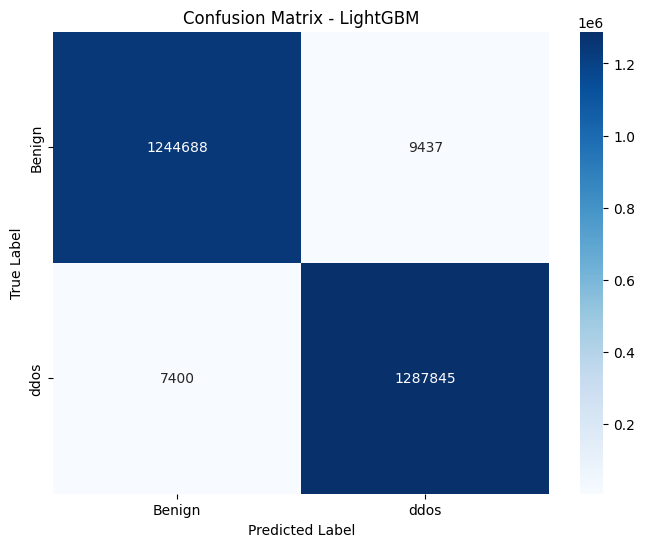

In [26]:
# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

print("\nLightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1-Score: {f1_lgbm:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Calculate and plot the confusion matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'ddos'], yticklabels=['Benign', 'ddos'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# LightGBM Model Evaluation

- The LightGBM model, based on gradient boosting, achieved an overall accuracy of 99.34%, reflecting excellent predictive performance across both benign and DDoS traffic.

- Precision (99.27%) indicates that when the model predicts DDoS, it is almost always correct, showing very low false positives.

- Recall (99.43%) demonstrates the model’s ability to successfully capture nearly all DDoS attacks, with only a small number of misses.

- F1-Score (99.35%), which balances precision and recall, further confirms the robustness of the model, especially in handling imbalanced classification problems.

# Confusion Matrix

1. The model is highly accurate (99.34%) with very few misclassifications.

2. Precision (99.27%) shows the model rarely mislabels benign as DDoS.

3. Recall (99.43%) indicates it captures almost all DDoS attacks, which is crucial in cybersecurity.

4. The low FN (7,400) is especially important because missing a DDoS attack can be more dangerous than a false alarm.

5. Balanced performance: both Benign and DDoS classes are classified well, meaning the model is not biased toward one class.

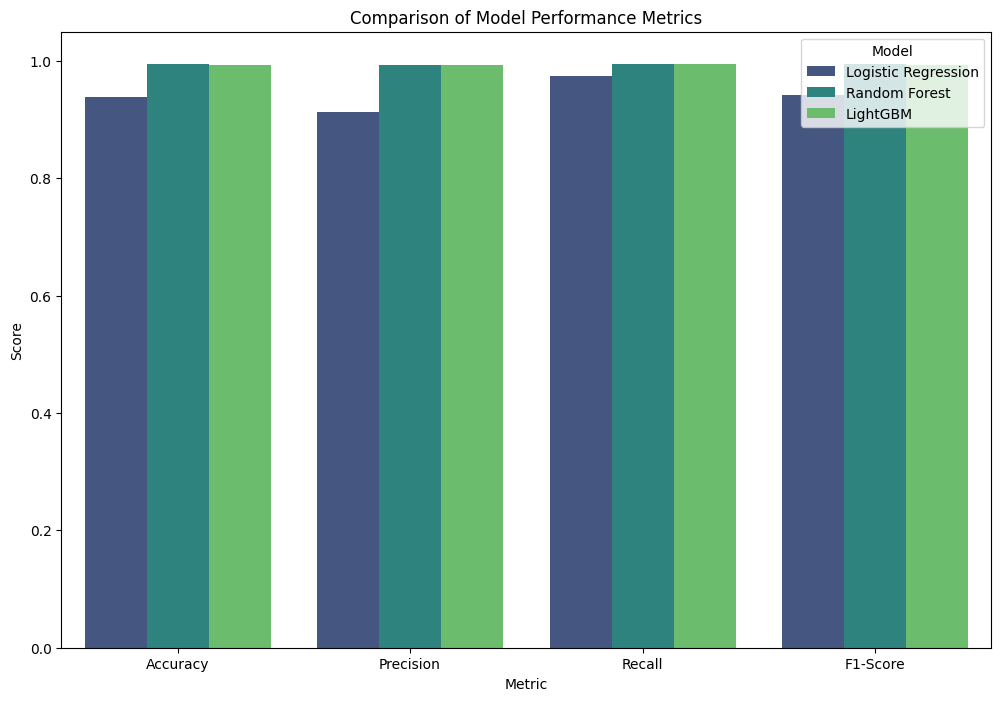

In [27]:
# Extract the evaluation metrics from the previous model runs
model_names = ['Logistic Regression', 'Random Forest', 'LightGBM']
accuracy_scores = [accuracy, accuracy_rf, accuracy_lgbm]
precision_scores = [precision, precision_rf, precision_lgbm]
recall_scores = [recall, recall_rf, recall_lgbm]
f1_scores = [f1, f1_rf, f1_lgbm]

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Visualize the comparison of metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.05) # Set y-axis limit from 0 to slightly above 1 for scores
plt.show()